In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
pokemon=pd.read_csv('pokemon.csv')
print(pokemon.shape)
pokemon.head()

(807, 14)


,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


# Bar Chart

In [3]:
base_color=sb.color_palette()[0]
gen_order = pokemon.generation_id.value_counts().index

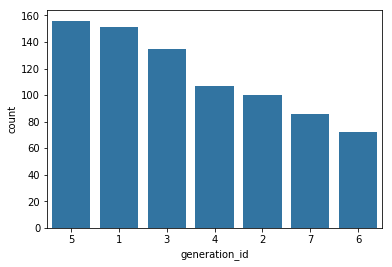

In [4]:
sb.countplot(data=pokemon,x='generation_id',color=base_color,order=gen_order);

Plotting type_1,  making it hard to read x-axis
2 ways to plot are, 

to rotate ticks in x-axis.

Make the bar chart horizontal


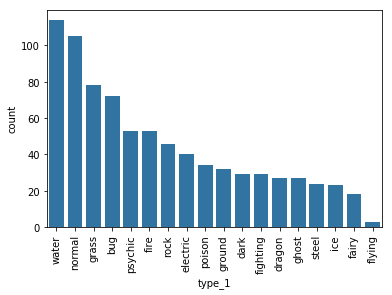

In [5]:
type_1_order=pokemon.type_1.value_counts().index
sb.countplot(data=pokemon,x='type_1',color=base_color,order=type_1_order);
plt.xticks(rotation=90);

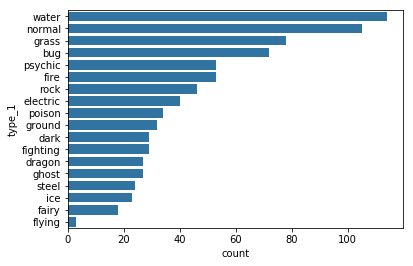

In [6]:
sb.countplot(data=pokemon,y='type_1',color=base_color,order=type_1_order);

### Absolute vs relative Frequency
To get the proportion of type_1 pokemons

In [7]:
n_pokemon=pokemon.shape[0]
type_1_counts=pokemon.type_1.value_counts()
max_type_count=type_1_counts.max()
max_prop=max_type_count/n_pokemon
print(max_prop,n_pokemon,max_type_count)

0.1412639405204461 807 114


In [8]:
tick_props= np.arange(0,max_prop,0.02)
tick_names = ['{:0.2f}'.format(i) for i in tick_props]
tick_names

['0.00', '0.02', '0.04', '0.06', '0.08', '0.10', '0.12', '0.14']

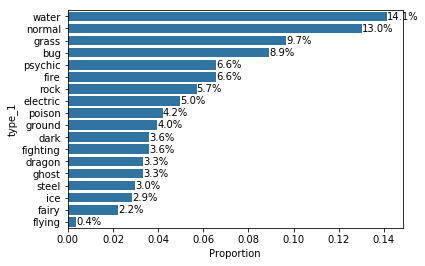

In [9]:
sb.countplot(data=pokemon,y='type_1',color=base_color,order=type_1_order);
locs, labels = plt.yticks()
# print('locations', locs)
# print('lables',list(labels))
plt.xticks(tick_props * n_pokemon, tick_names);
locs, labels = plt.yticks()
# print('locations', locs)
# print('lables',list(labels))
plt.xlabel('Proportion');

# for i in range(type_1_counts.shape[0]):
#     count = type_1_counts[i]
#     pct_string ='{:0.1f}%'.format(100*count/n_pokemon)
#     plt.text(count+1,i,pct_string,va='center');
    
for loc,label in zip(locs,labels):
    count = type_1_counts[label.get_text()]
    pct_string ='{:0.1f}%'.format(100*count/n_pokemon)
    plt.text(count,loc,pct_string,va='center');

### Missing data bar plots

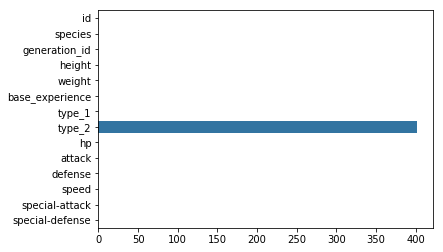

In [10]:
na_counts=pokemon.isna().sum()
sb.barplot(y=na_counts.index.values,x=na_counts,color=base_color)

### Proportion Plot for Type of Pokemon

In [11]:
pkmn_types = pokemon.melt(id_vars = ['id','species'], 
                          value_vars = ['type_1', 'type_2'], 
                          var_name = 'type_level', value_name = 'type').dropna()
pkmn_types.head()

,id,species,type_level,type
0,1,bulbasaur,type_1,grass
1,2,ivysaur,type_1,grass
2,3,venusaur,type_1,grass
3,4,charmander,type_1,fire
4,5,charmeleon,type_1,fire


In [12]:
pokemon[pokemon.species.isin(['charmander','charmeleon','charizard','dragonite'])]

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65
5,6,charizard,1,1.7,90.5,240,fire,flying,78,84,78,100,109,85
148,149,dragonite,1,2.2,210.0,270,dragon,flying,91,134,95,80,100,100


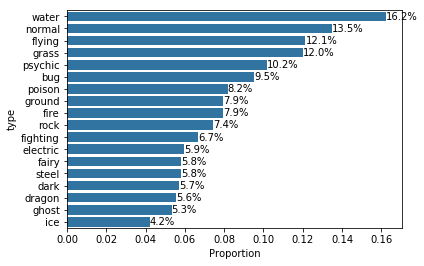

In [13]:
type_counts=pkmn_types.type.value_counts()
max_type_count=type_counts.max()
type_max_prop=max_type_count/n_pokemon
tytick_props= np.arange(0,type_max_prop,0.02)
tytick_names = ['{:0.2f}'.format(i) for i in tytick_props]
type_order=type_counts.index

sb.countplot(data=pkmn_types,y='type',color=base_color,order=type_order);
plt.xticks(tytick_props * n_pokemon, tytick_names);
locs, labels = plt.yticks()
plt.xlabel('Proportion');

for loc,label in zip(locs,labels):
    count = type_counts[label.get_text()]
    pct_string ='{:0.1f}%'.format(100*count/n_pokemon)
    plt.text(count,loc,pct_string,va='center');

# Pie Chart

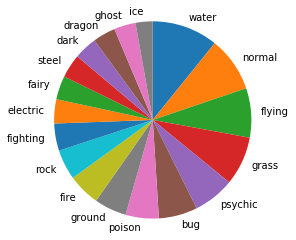

In [14]:
plt.pie(type_counts, labels = type_counts.index, startangle = 90,
        counterclock = False);
plt.axis('square');

##### Donut Chart (Sister chart of pie chart)
Adding,property **wedgeprops = {'width' : 0.4}** following to pie chart makes it domut chart



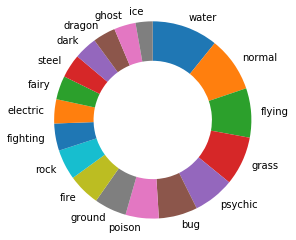

In [15]:
plt.pie(type_counts, labels = type_counts.index, startangle = 90,
        counterclock = False,wedgeprops = {'width' : 0.4});
plt.axis('square');

# Histograms

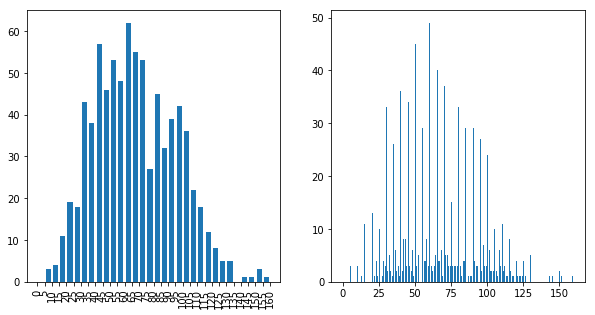

In [16]:
plt.figure(figsize=[10,5]) # larger figure size for subplots

# histogram on left, example of too-large bin size
plt.subplot(1, 2, 1) # 1 row, 2 cols, subplot 1
bins = np.arange(0,pokemon.speed.max()+5,5)
plt.hist(data=pokemon,x='speed',bins=bins,rwidth=0.7);
plt.xticks(np.arange(0,pokemon.speed.max()+5,5),rotation=90)

# histogram on right, example of too-small bin size
plt.subplot(1, 2, 2) # 1 row, 2 cols, subplot 2
bins = np.arange(0,pokemon.speed.max()+1,1)
plt.hist(data=pokemon,x='speed',bins=bins,rwidth=0.7);

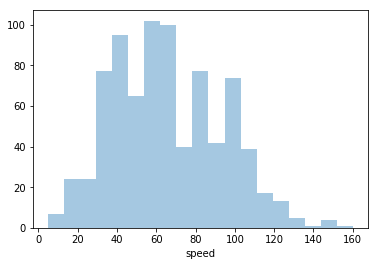

In [57]:
sb.distplot(pokemon.speed,kde=False);

### Subplots

AxesSubplot(0.731522,0.125;0.168478x0.222059)


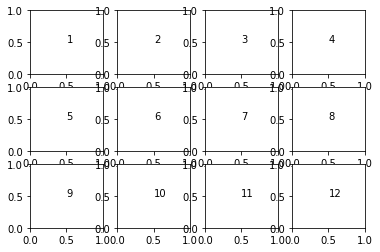

In [68]:
fig, axes = plt.subplots(3, 4) # grid of 3x4 subplots
axes = axes.flatten() # reshape from 3x4 array into 12-element vector
for i in range(12):
    plt.sca(axes[i]) # set the current Axes
    plt.text(0.5, 0.5, i+1) # print conventional subplot index number to middle of Axes
    
ax=plt.gca()    
print(ax)

## Scales and Transformations

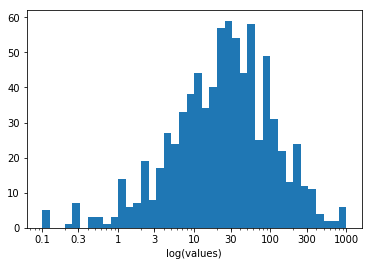

In [17]:
min_wt=np.log10(pokemon.weight.min())
max_wt=np.log10(pokemon.weight.max())
bins=10**np.arange(min_wt,max_wt+0.1,0.1)
plt.hist(data=pokemon,x='weight',bins=bins);
plt.xscale('log')

ticks=[0.1,0.3,1,3,10,30,100,300,1000]
labels=[str(i) for i in ticks]
plt.xticks(ticks,labels);
plt.xlabel('log(values)');

### Univariate Waffle Plots

Alternative to Pie Chart, and eassy to make precise assessments of relative frequencies.

In [20]:
def percentage_blocks(df, var):
    """
    Take as input a dataframe and variable, and return a Pandas series with
    approximate percentage values for filling out a waffle plot.
    """
    # compute base quotas
    percentages = 100 * df[var].value_counts() / df.shape[0]
    counts = np.floor(percentages).astype(int) # integer part = minimum quota
    decimal = (percentages - counts).sort_values(ascending = False)

    # add in additional counts to reach 100
    rem = 100 - counts.sum()
    for cat in decimal.index[:rem]:
        counts[cat] += 1

    return counts

waffle_counts = percentage_blocks(pokemon, 'type_1')

In [29]:
list(waffle_counts.index)

['water',
 'normal',
 'grass',
 'bug',
 'psychic',
 'fire',
 'rock',
 'electric',
 'poison',
 'ground',
 'dark',
 'fighting',
 'dragon',
 'ghost',
 'steel',
 'ice',
 'fairy',
 'flying']

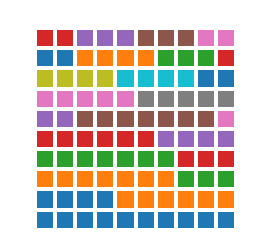

In [31]:
prev_count = 0
# for each category,
for cat in range(waffle_counts.shape[0]):
    # get the block indices
    blocks = np.arange(prev_count, prev_count + waffle_counts[cat])
    # and put a block at each index's location
    x = blocks % 10 # use mod operation to get ones digit
    y = blocks // 10 # use floor division to get tens digit
    plt.bar(x = x, height = 0.8, width = 0.8, bottom = y)
    prev_count += waffle_counts[cat]
                                
# aesthetic wrangling
# plt.legend(list(waffle_counts.index), bbox_to_anchor = (1, 0.5), loc = 6)
plt.axis('off')
plt.axis('square');

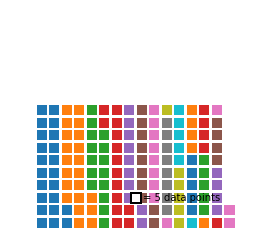

In [36]:
waffle_counts = (pokemon['type_1'].value_counts() / 5).astype(int)

prev_count = 0
# for each category,
for cat in range(waffle_counts.shape[0]):
    # get the block indices
    blocks = np.arange(prev_count, prev_count + waffle_counts[cat])
    # and put a block at each index's location
    x = blocks % 10
    y = blocks // 10
    plt.bar(y, 0.8, 0.8, x)
    prev_count += waffle_counts[cat]

# box size legend
plt.bar(7.5, 0.8, 0.8, 2, color = 'white', edgecolor = 'black', lw = 2)
plt.text(8.1, 2.4,'= 5 data points', va = 'center')

# aesthetic wrangling
# plt.legend(waffle_counts.index, bbox_to_anchor = (0.8, 0.5), loc = 6)
plt.axis('off')
plt.axis('square');